# Constraints Demo:

Constraints to apply:

 * 10 deg < target altitude < 80 deg
 * target airmass < 5
 * can be observed between civil twilights (solar altitude < -6 deg)
 
Targets: "Polaris", "Vega", "Albireo", "Algol", "Rigel", "Regulus"

Observer: Subaru on the night of 2015-08-01 UTC

In [2]:
##############################################################
# Import my dev version of astroplan:
import os; astroplan_dev = os.environ['GITASTROPLANPATH']
import sys; sys.path.insert(0, astroplan_dev)
##############################################################

from astroplan import Observer, FixedTarget
from astroplan.constraints import (is_observable, is_always_observable,
                                   AltitudeConstraint, AirmassConstraint,
                                   AtNight)
from astropy.time import Time
import astropy.units as u

# Are these targets visible on Jan 1 from 06:00-12:00 UTC, at Subaru?
subaru = Observer.at_site("Subaru")
time_range = Time(["2015-08-01 06:00", "2015-08-01 12:00"])
target_names = ["Polaris", "Vega", "Albireo", "Algol", "Rigel", "Regulus"]
targets = [FixedTarget.from_name(name) for name in target_names]

constraint_list = [AltitudeConstraint(10*u.deg, 80*u.deg),
                   AirmassConstraint(5), AtNight.twilight_civil()]

# Are targets *ever* observable in the time range?
ever = is_observable(constraint_list, time_range, targets, subaru)

# Are targets *always* observable in the time range?
always = is_always_observable(constraint_list, time_range, targets, subaru)

### Print results in table: 

In [3]:
observability_report = []
justify = 15
def prep_line(*data):
    # For printing data in neat columns
    return ''.join([str(i).ljust(justify) for i in data])

headers = ['Star', 'ever obs-able', 'always obs-able']
observability_report.append(prep_line(*headers))
observability_report.append(prep_line(*['-'*len(header) for header in headers]))

for target, e, a in zip(targets, ever, always):
    observability_report.append(prep_line(target.name, e, a))

print "\n".join(observability_report)

Star           ever obs-able  always obs-able
----           -------------  ---------------
Polaris        True           True           
Vega           True           True           
Albireo        True           False          
Algol          True           False          
Rigel          False          False          
Regulus        False          False          


### Sanity check with sky plots

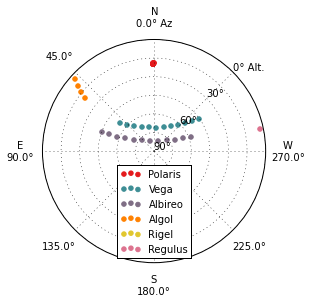

In [7]:
%matplotlib inline
from astroplan.plots import plot_sky
import matplotlib.pyplot as plt
import matplotlib.cm as cm
cmap = cm.Set1
from astroplan.constraints import time_grid_from_range
time_grid = time_grid_from_range(time_range)
[plot_sky(target, subaru, time_grid,
          style_kwargs={'color':cmap(float(i)/len(targets)),
                        'label':target.name}) 
 for i, target in enumerate(targets)];
legend = plt.gca().legend(loc='lower center', fontsize=10)
legend.get_frame().set_facecolor('w')